# 군집 알고리즘
## 과일 사진 데이터 준비하기

In [24]:
import numpy as np # 넘파이 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt # matplotlib 라이브러리를 불러옵니다.

In [25]:
fruits = np.load('data/fruits_300.npy') # 데이터셋을 불러옵니다.

In [26]:
print(fruits.shape) # 데이터셋의 형태를 출력합니다.

(300, 100, 100)


In [27]:
print(fruits[0, 0, :]) # 첫 번째 이미지의 픽셀 값을 출력합니다.

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


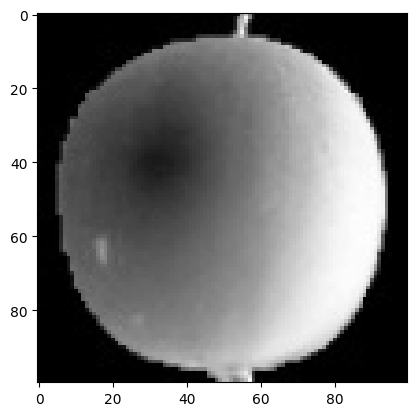

In [28]:
plt.imshow(fruits[0], cmap='gray') # 첫 번째 이미지를 회색조로 표시합니다.
plt.show() # 첫 번째 이미지의 픽셀 값을 출력합니다.

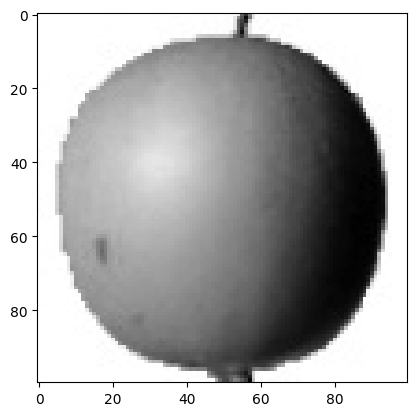

In [29]:
plt.imshow(fruits[0], cmap='gray_r') # 첫 번째 이미지를 회색조로 반전하여 표시합니다.
plt.show() # 첫 번째 이미지의 픽셀 값을 출력합니다.

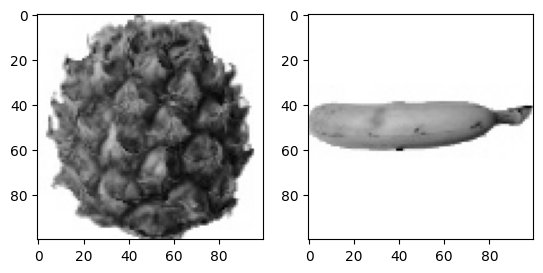

In [30]:
fig, axs = plt.subplots(1, 2) # 1행 2열의 서브플롯을 생성합니다.
axs[0].imshow(fruits[100], cmap='gray_r') # 첫 번째 서브플롯에 100번째 이미지를 회색조로 반전하여 표시합니다.
axs[1].imshow(fruits[200], cmap='gray_r') # 두 번째 서브플롯에 200번째 이미지를 회색조로 반전하여 표시합니다.
plt.show() # 서브플롯을 사용하여 두 개의 이미지를 나란히 표시합니다.

## 픽셀 값 분석하기

In [31]:
apple = fruits[0:100].reshape(-1, 100*100) # 사과 데이터셋을 2차원 배열로 변환합니다.
pineapple = fruits[100:200].reshape(-1, 100*100) # 파인애플 데이터셋을 2차원 배열로 변환합니다.
banana = fruits[200:300].reshape(-1, 100*100)  # 바나나 데이터셋을 2차원 배열로 변환합니다.

In [32]:
print(apple.shape) # 사과 데이터셋의 형태를 출력합니다.

(100, 10000)


In [33]:
print(apple.mean(axis=1)) # 사과 데이터셋의 각 이미지의 평균 픽셀 값을 출력합니다.

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


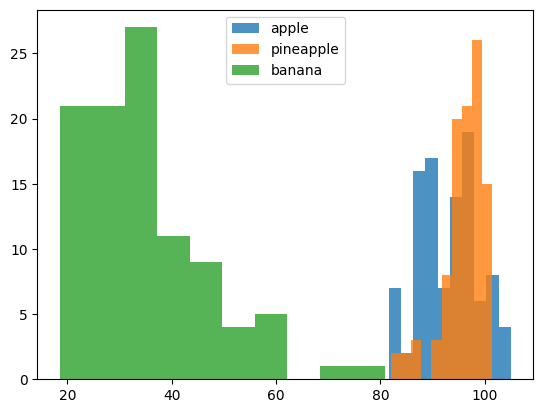

In [34]:
plt.hist(np.mean(apple, axis=1), alpha=0.8) # 사과의 평균 픽셀 값의 히스토그램을 그립니다.
plt.hist(np.mean(pineapple, axis=1), alpha=0.8) # 파인애플의 평균 픽셀 값의 히스토그램을 그립니다.
plt.hist(np.mean(banana, axis=1), alpha=0.8) # 바나나의 평균 픽셀 값의 히스토그램을 그립니다.
plt.legend(['apple', 'pineapple', 'banana']) # 범례를 추가합니다.
plt.show() # 히스토그램을 표시합니다.

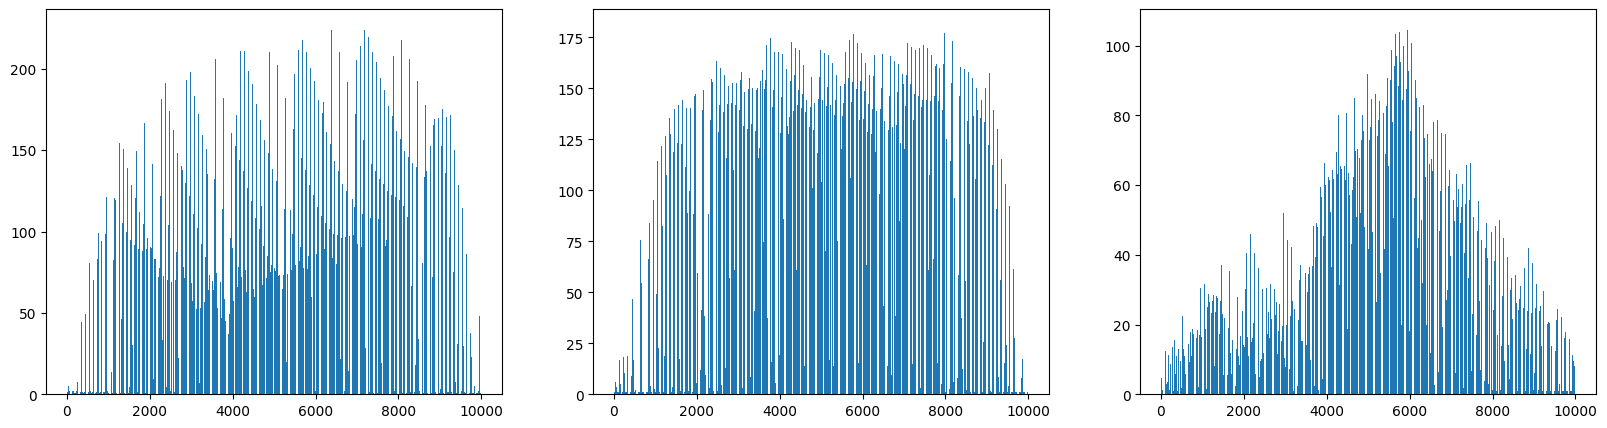

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1행 3열의 서브플롯을 생성합니다.
axs[0].bar(range(10000), np.mean(apple, axis=0)) # 사과의 평균 픽셀 값을 막대 그래프로 표시합니다.
axs[1].bar(range(10000), np.mean(pineapple, axis=0)) # 파인애플의 평균 픽셀 값을 막대 그래프로 표시합니다.
axs[2].bar(range(10000), np.mean(banana, axis=0)) # 바나나의 평균 픽셀 값을 막대 그래프로 표시합니다.
plt.show() # 서브플롯을 사용하여 세 개의 과일의 평균 픽셀 값을 나란히 표시합니다.

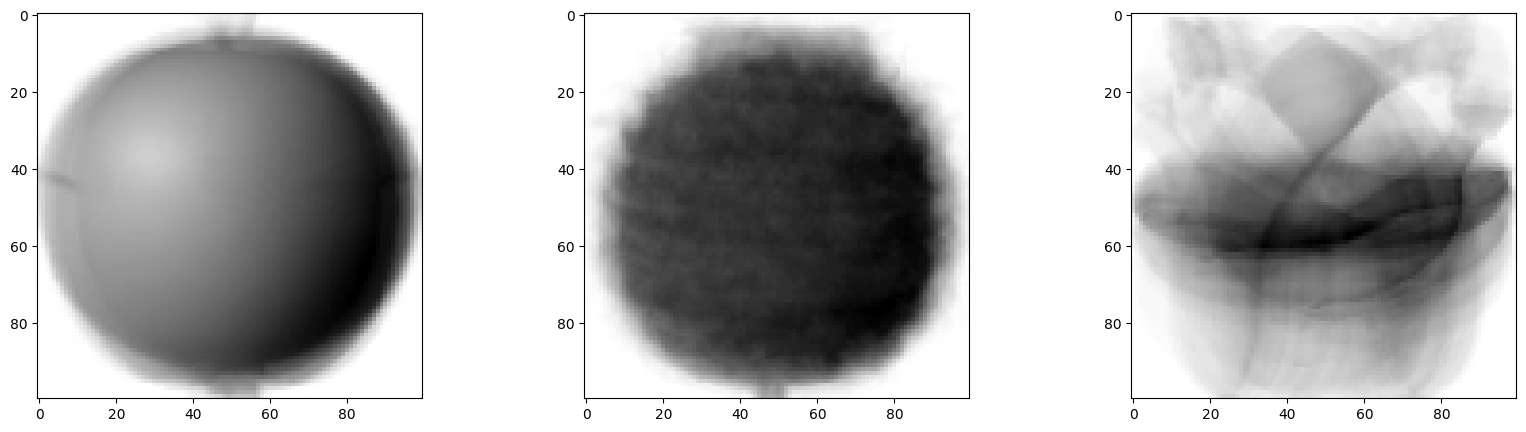

In [36]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100) # 사과의 평균 픽셀 값을 100x100 형태로 변환합니다.
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100) # 파인애플의 평균 픽셀 값을 100x100 형태로 변환합니다.
banana_mean = np.mean(banana, axis=0).reshape(100, 100) # 바나나의 평균 픽셀 값을 100x100 형태로 변환합니다.

fig, axs = plt.subplots(1, 3, figsize=(20, 5)) # 1행 3열의 서브플롯을 생성합니다.
axs[0].imshow(apple_mean, cmap='gray_r') # 사과의 평균 픽셀 값을 회색조로 반전하여 표시합니다.
axs[1].imshow(pineapple_mean, cmap='gray_r') # 파인애플의 평균 픽셀 값을 회색조로 반전하여 표시합니다.
axs[2].imshow(banana_mean, cmap='gray_r') # 바나나의 평균 픽셀 값을 회색조로 반전하여 표시합니다.
plt.show() # 서브플롯을 사용하여 세 개의 과일의 평균 픽셀 값을 나란히 표시합니다.

## 평균값과 가까운 사진 고르기

In [37]:
abs_diff = np.abs(fruits - apple_mean) # 각 이미지와 사과의 평균 이미지 간의 절대 차이를 계산합니다.
abs_mean = np.mean(abs_diff, axis=(1,2)) # 각 이미지의 절대 차이의 평균을 계산합니다.
print(abs_mean.shape) # 절대 차이의 평균의 형태를 출력합니다.

(300,)


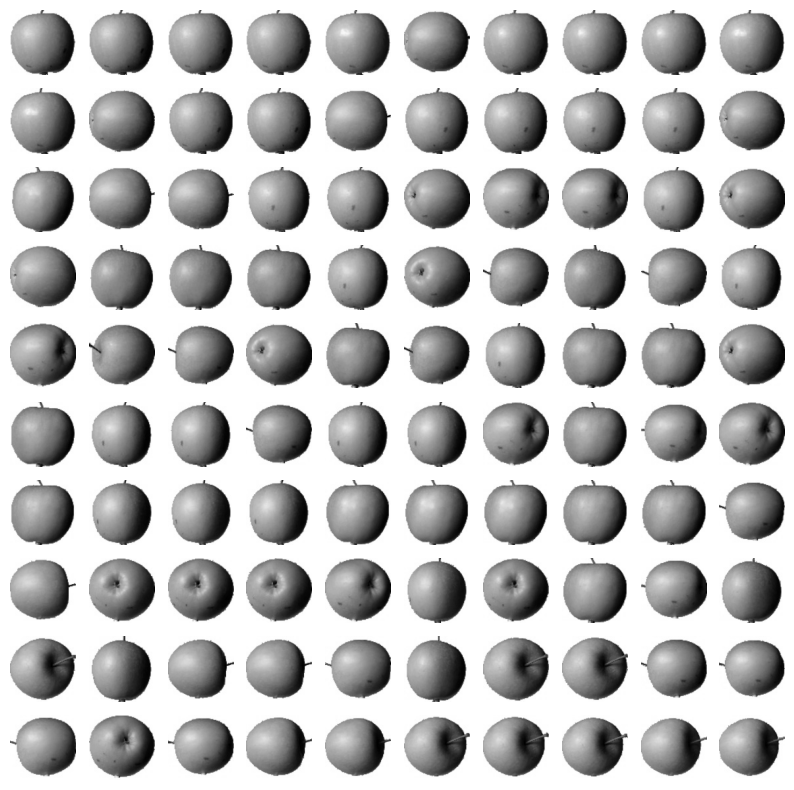

In [38]:
apple_index = np.argsort(abs_mean)[:100] # 사과의 평균 픽셀 값과 가장 가까운 100개의 이미지의 인덱스를 찾습니다.
fig, axs = plt.subplots(10, 10, figsize=(10,10)) # 10행 10열의 서브플롯을 생성합니다.
for i in range(10): # 10개의 행을 반복합니다.
    for j in range(10): # 각 행에 대해 10개의 열을 반복합니다.
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r') 
        # 사과의 평균 픽셀 값과 가장 가까운 이미지들을 회색조로 반전하여 표시합니다.
        axs[i, j].axis('off') # 축을 숨깁니다.
plt.show() # 서브플롯을 사용하여 사과의 평균 픽셀 값과 가장 가까운 이미지들을 나란히 표시합니다.

## 확인 문제

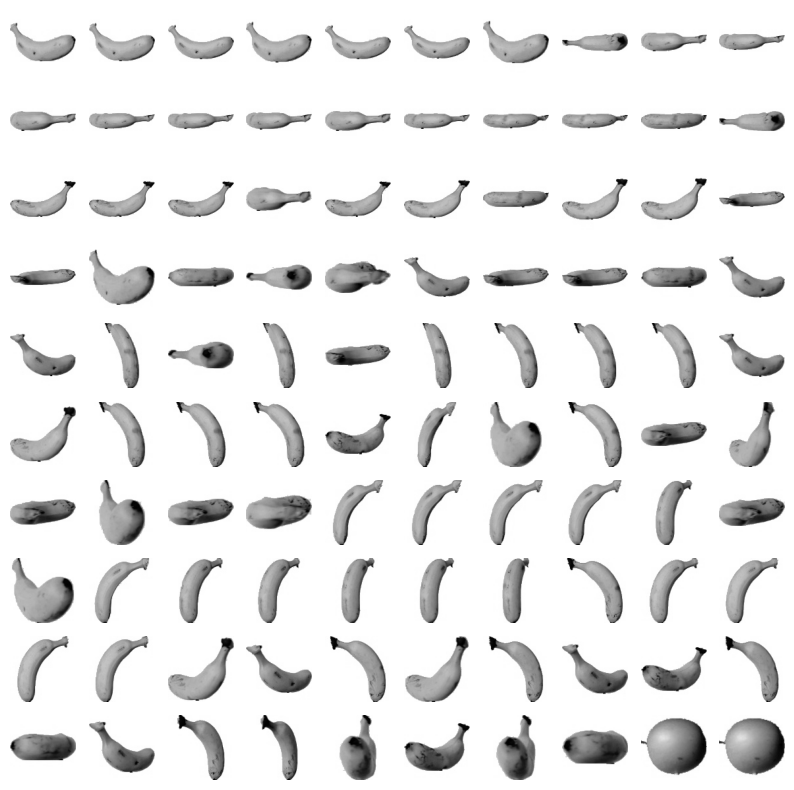

In [39]:
abs_diff = np.abs(fruits - banana_mean) # 각 이미지와 바나나의 평균 이미지 간의 절대 차이를 계산합니다.
abs_mean = np.mean(abs_diff, axis=(1,2)) # 각 이미지의 절대 차이의 평균을 계산합니다.

banana_index = np.argsort(abs_mean)[:100] # 바나나의 평균 픽셀 값과 가장 가까운 100개의 이미지의 인덱스를 찾습니다.
fig, axs = plt.subplots(10, 10, figsize=(10,10)) # 10행 10열의 서브플롯을 생성합니다.
for i in range(10): # 10개의 행을 반복합니다.
    for j in range(10): # 각 행에 대해 10개의 열을 반복합니다.
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r') 
        # 바나나의 평균 픽셀 값과 가장 가까운 이미지들을 회색조로 반전하여 표시합니다.
        axs[i, j].axis('off') # 축을 숨깁니다.
plt.show() # 서브플롯을 사용하여 바나나의 평균 픽셀 값과 가장 가까운 이미지들을 나란히 표시합니다.